# Decision Tree

# Loads of datasets

In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

PIK = "/content/drive/My Drive/TA/Tokenizzazioni_per_Inglese/states.dat"
with open(PIK, "rb") as f:
    bert_en = pickle.load(f)

PIK = "/content/drive/My Drive/TA/Tokenizzazioni_per_Italiano/MultilingualBertIt.dat"
with open(PIK, "rb") as f:
    bert_it = pickle.load(f)

In [0]:
en = pd.read_csv("/content/drive/My Drive/TA/Dataset/en_training.tsv",sep="\t")
it = pd.read_csv("/content/drive/My Drive/TA/Dataset/it_training.tsv",sep="\t")

# Decision Tree (English dataset)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [0]:
X = bert_en[1].numpy()
y = en["misogynous"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [12]:
x_train.shape, x_test.shape

((3200, 768), (800, 768))

In [13]:
y_train.value_counts() # the values are distributed in a relatively balanced manner

0    1785
1    1415
Name: misogynous, dtype: int64

## Optimal parameters

In [0]:
from sklearn.metrics import *

In [56]:
# test with different for min_samples_split and min_samples_leaf with gini criterion
for sp in range(10,100,10):
    for le in range(10,100,10):
        clf = DecisionTreeClassifier(criterion='gini', max_depth=None,min_samples_split=sp, min_samples_leaf=le)
        clf.fit(x_train, y_train)
        print("sp ",sp)
        print("le ",le)
        y_pred = clf.predict(x_train)
        print('Accuracy Train %s' % accuracy_score(y_train, y_pred))
        print('F1-score %s' % f1_score(y_train, y_pred, average=None))
        print(classification_report(y_train, y_pred))
        y_pred = clf.predict(x_test)
        print('Accuracy Test %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred))

sp  10
le  10
Accuracy Train 0.8834375
F1-score [0.8939437  0.87062088]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1750
           1       0.88      0.87      0.87      1450

    accuracy                           0.88      3200
   macro avg       0.88      0.88      0.88      3200
weighted avg       0.88      0.88      0.88      3200

Accuracy Test 0.6275
F1-score [0.66666667 0.57790368]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       422
           1       0.62      0.54      0.58       378

    accuracy                           0.63       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.63      0.62       800

sp  10
le  20
Accuracy Train 0.8203125
F1-score [0.84396201 0.78821363]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1750
           1       0.85      0.74      

In [57]:
# test with different for min_samples_split and min_samples_leaf with entropy criterion
for sp in range(10,100,10):
    for le in range(10,100,10):
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=sp, min_samples_leaf=le)
        clf.fit(x_train, y_train)
        print("sp ",sp)
        print("le ",le)
        y_pred = clf.predict(x_train)
        print('Accuracy Training %s' % accuracy_score(y_train, y_pred))
        print('F1-score %s' % f1_score(y_train, y_pred, average=None))
        print(classification_report(y_train, y_pred))
        y_pred = clf.predict(x_test)
        print('Accuracy Test %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred))

sp  10
le  10
Accuracy Training 0.91125
F1-score [0.91815562 0.90307167]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1750
           1       0.89      0.91      0.90      1450

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200

Accuracy Test 0.5875
F1-score [0.62328767 0.5441989 ]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       422
           1       0.57      0.52      0.54       378

    accuracy                           0.59       800
   macro avg       0.59      0.58      0.58       800
weighted avg       0.59      0.59      0.59       800

sp  10
le  20
Accuracy Training 0.8271875
F1-score [0.85025724 0.79571481]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1750
           1       0.86      0.74  

### Cross Validation  

In [0]:
from sklearn.model_selection import cross_val_score

In [59]:
import time 
# classification with gini
start_time=time.time();
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=20, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.866422414779663 seconds ---


In [60]:
# cross validation test with different division numbers 
for i in range (10,50,10):
    print("Num of div: ",i)
    scores = cross_val_score(clf, x_train, y_train, cv=i)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    scores = cross_val_score(clf, x_train, y_train, cv=i, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    print("Scores : \n" , scores)
    scores

Num of div:  10
Accuracy: 0.6334 (+/- 0.05)
F1-score: 0.6281 (+/- 0.05)
Scores : 
 [0.62167488 0.60855685 0.62504554 0.58854249 0.65864644 0.61904762
 0.61386295 0.63968235 0.62915601 0.67688517]
Num of div:  20
Accuracy: 0.6306 (+/- 0.05)
F1-score: 0.6254 (+/- 0.06)
Scores : 
 [0.56955214 0.61536946 0.60275862 0.6665487  0.62703963 0.68147794
 0.60061809 0.6050002  0.66117647 0.63174603 0.61636829 0.59934815
 0.65232508 0.5744015  0.63682886 0.6432553  0.60858586 0.6187245
 0.65403288 0.64194373]
Num of div:  30
Accuracy: 0.6278 (+/- 0.11)
F1-score: 0.6252 (+/- 0.11)
Scores : 
 [0.72551968 0.68199301 0.61561377 0.58439266 0.64980097 0.60661765
 0.56703026 0.64629679 0.69493942 0.53343023 0.62217514 0.56703026
 0.66719986 0.59301194 0.61942544 0.6101484  0.56824561 0.62217514
 0.62916556 0.70865173 0.63945578 0.49132521 0.67355072 0.7400781
 0.64172833 0.64561308 0.53270355 0.57522769 0.66306421 0.63945578]
Num of div:  40
Accuracy: 0.6262 (+/- 0.12)
F1-score: 0.6178 (+/- 0.11)
Scores 

In [61]:
# classification with entropy
start_time=time.time();
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                             min_samples_split=10, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.704871416091919 seconds ---


In [62]:
# cross validation test with different division numbers 
for i in range (10,50,10):
    print("Num of div: ",i)
    scores = cross_val_score(clf, x_train, y_train, cv=i)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    scores = cross_val_score(clf, x_train, y_train, cv=i, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    print("Scores : \n" , scores)
    scores

Num of div:  10
Accuracy: 0.6428 (+/- 0.06)
F1-score: 0.6387 (+/- 0.07)
Scores : 
 [0.67071414 0.65817376 0.66109412 0.54004302 0.62447191 0.65119651
 0.62597567 0.6321297  0.64307923 0.67967968]
Num of div:  20
Accuracy: 0.6284 (+/- 0.07)
F1-score: 0.6239 (+/- 0.08)
Scores : 
 [0.70204842 0.61753987 0.65714286 0.59934815 0.6362331  0.64059113
 0.6050002  0.52231301 0.62352941 0.62703963 0.58221238 0.61536946
 0.66401204 0.65232508 0.56825397 0.65904065 0.66873706 0.60388003
 0.62478636 0.60920921]
Num of div:  30
Accuracy: 0.6426 (+/- 0.08)
F1-score: 0.6429 (+/- 0.09)
Scores : 
 [0.74544013 0.64629679 0.60716783 0.6032839  0.59731183 0.71049784
 0.65851064 0.65995763 0.69774011 0.53679654 0.58585503 0.57811268
 0.62350457 0.6245614  0.69119769 0.58846154 0.6271777  0.69749202
 0.59587176 0.64408263 0.71443966 0.63945578 0.6619137  0.64172833
 0.60899685 0.66836507 0.62455726 0.69275362 0.68529015 0.63125502]
Num of div:  40
Accuracy: 0.6350 (+/- 0.11)
F1-score: 0.6267 (+/- 0.12)
Score

## Gini Criterion

In [15]:
# gini criterion
import time
start_time=time.time();
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=20, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.9129183292388916 seconds ---


In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [17]:
clf.classes_

array([0, 1])

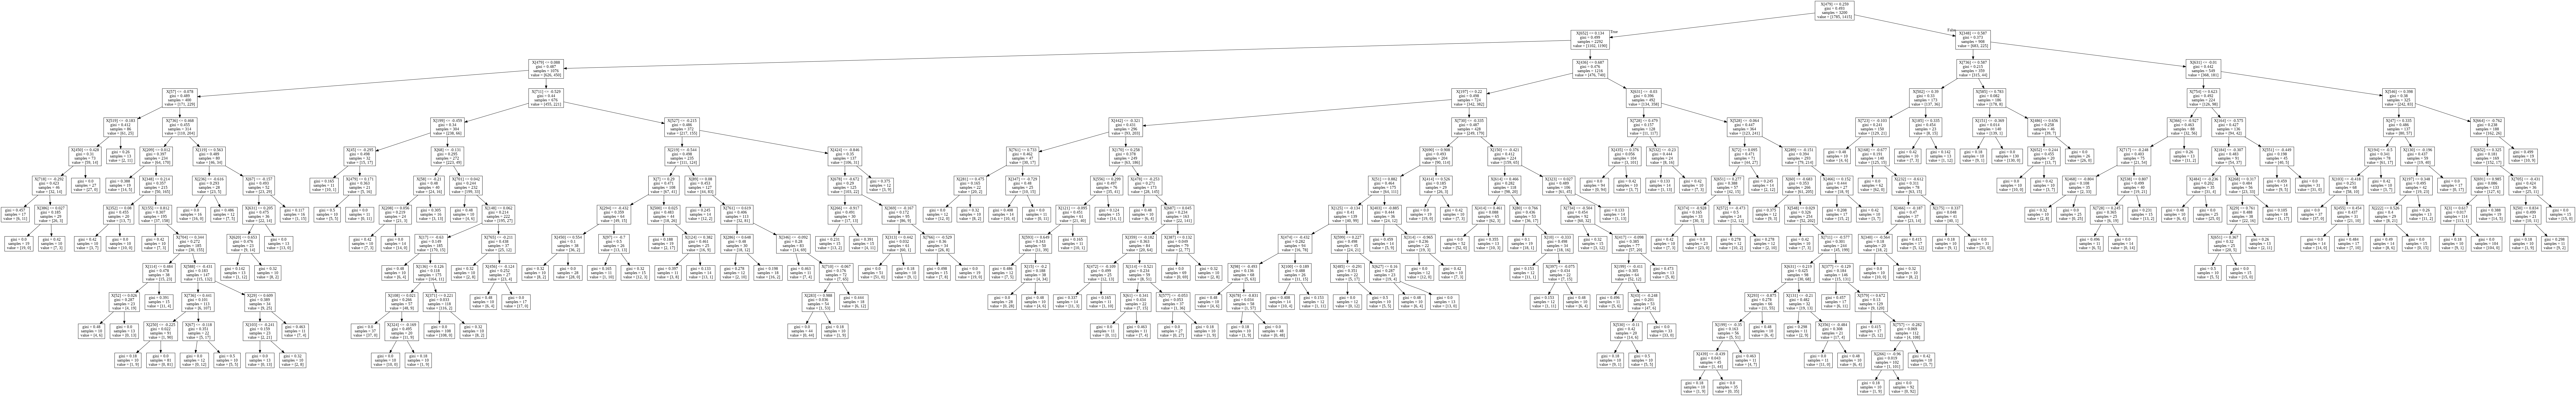

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                #feature_names=features, 
                                #class_names=clf.classes_,  
                                #filled=True, rounded=True,  
                                #special_characters=True
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [19]:
# prediction on train set
start_time=time.time();
y_pred = clf.predict(x_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007217884063720703 seconds ---


In [20]:
from sklearn.metrics import *
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8878125
F1-score [0.90080133 0.87090974]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1785
           1       0.89      0.86      0.87      1415

    accuracy                           0.89      3200
   macro avg       0.89      0.88      0.89      3200
weighted avg       0.89      0.89      0.89      3200



In [21]:
confusion_matrix(y_train, y_pred)

array([[1630,  155],
       [ 204, 1211]])

In [22]:
# prediction on test set
start_time=time.time();
y_pred = clf.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0021462440490722656 seconds ---


In [23]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.585
F1-score [0.62780269 0.53107345]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       430
           1       0.56      0.51      0.53       370

    accuracy                           0.58       800
   macro avg       0.58      0.58      0.58       800
weighted avg       0.58      0.58      0.58       800



array([[280, 150],
       [182, 188]])

## Entropy Criterion

In [24]:
# entropy criterion
start_time=time.time();
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                             min_samples_split=10, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.613447427749634 seconds ---


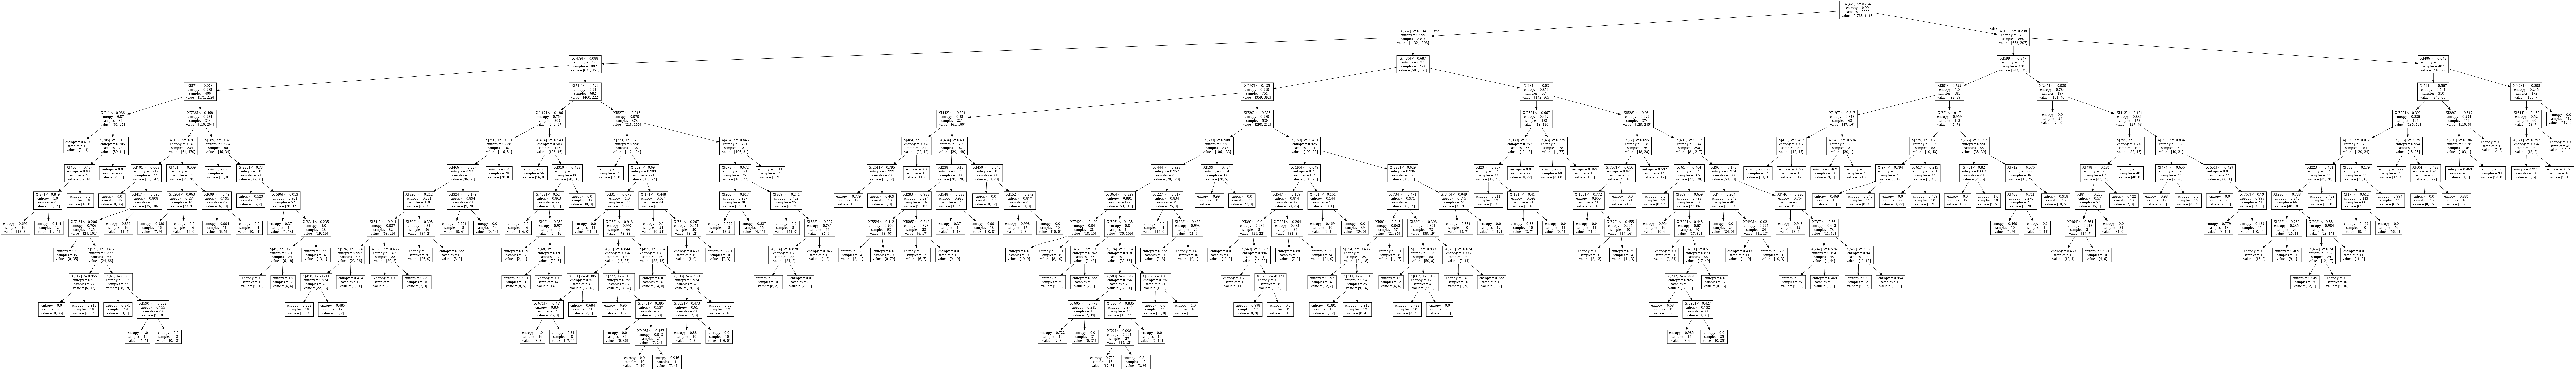

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                #feature_names=features, 
                                #class_names=clf.classes_,  
                                #filled=True, rounded=True,  
                                #special_characters=True
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [26]:
# prediction on train set
start_time=time.time();
y_pred = clf.predict(x_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0059452056884765625 seconds ---


In [27]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Accuracy 0.8971875
F1-score [0.91023192 0.8797075 ]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1785
           1       0.91      0.85      0.88      1415

    accuracy                           0.90      3200
   macro avg       0.90      0.89      0.89      3200
weighted avg       0.90      0.90      0.90      3200



array([[1668,  117],
       [ 212, 1203]])

In [28]:
# prediction on test set
start_time=time.time();
y_pred = clf.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0019257068634033203 seconds ---


In [29]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.5975
F1-score [0.64537445 0.53468208]
              precision    recall  f1-score   support

           0       0.61      0.68      0.65       430
           1       0.57      0.50      0.53       370

    accuracy                           0.60       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.60      0.60      0.59       800



array([[293, 137],
       [185, 185]])

## ROC Curve

In [0]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [31]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

[0, 1]

In [32]:
# ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
fpr, tpr, _ = roc_curve(by_test[:], by_pred[:])
roc_auc = auc(fpr, tpr)
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.5906976744186048

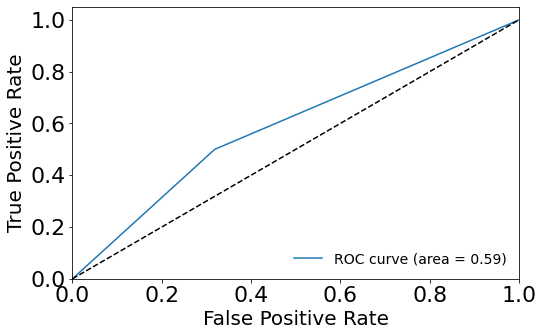

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

# Decision Tree (Italian dataset)

In [0]:
X = bert_it[1].numpy()
y = it["misogynous"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [35]:
x_train.shape, x_test.shape

((3200, 768), (800, 768))

In [36]:
y_train.value_counts() # the values are distributed in a relatively balanced manner

0    1750
1    1450
Name: misogynous, dtype: int64

## Optimal parameters

In [63]:
# test with different for min_samples_split and min_samples_leaf with gini criterion
for sp in range(10,100,10):
    for le in range(10,100,10):
        clf = DecisionTreeClassifier(criterion='gini', max_depth=None,min_samples_split=sp, min_samples_leaf=le)
        clf.fit(x_train, y_train)
        print("sp ",sp)
        print("le ",le)
        y_pred = clf.predict(x_train)
        print('Accuracy Train %s' % accuracy_score(y_train, y_pred))
        print('F1-score %s' % f1_score(y_train, y_pred, average=None))
        print(classification_report(y_train, y_pred))
        y_pred = clf.predict(x_test)
        print('Accuracy Test %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred))

sp  10
le  10
Accuracy Train 0.883125
F1-score [0.8936896  0.87022901]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1750
           1       0.88      0.86      0.87      1450

    accuracy                           0.88      3200
   macro avg       0.88      0.88      0.88      3200
weighted avg       0.88      0.88      0.88      3200

Accuracy Test 0.62375
F1-score [0.66293393 0.57425743]
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       422
           1       0.62      0.54      0.57       378

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.62       800

sp  10
le  20
Accuracy Train 0.8203125
F1-score [0.84396201 0.78821363]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1750
           1       0.85      0.74      

In [64]:
# test with different for min_samples_split and min_samples_leaf with entropy criterion
for sp in range(10,100,10):
    for le in range(10,100,10):
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=sp, min_samples_leaf=le)
        clf.fit(x_train, y_train)
        print("sp ",sp)
        print("le ",le)
        y_pred = clf.predict(x_train)
        print('Accuracy Training %s' % accuracy_score(y_train, y_pred))
        print('F1-score %s' % f1_score(y_train, y_pred, average=None))
        print(classification_report(y_train, y_pred))
        y_pred = clf.predict(x_test)
        print('Accuracy Test %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred))

sp  10
le  10
Accuracy Training 0.9078125
F1-score [0.9156902  0.89831093]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1750
           1       0.90      0.90      0.90      1450

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200

Accuracy Test 0.6075
F1-score [0.64719101 0.55774648]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       422
           1       0.60      0.52      0.56       378

    accuracy                           0.61       800
   macro avg       0.61      0.60      0.60       800
weighted avg       0.61      0.61      0.60       800

sp  10
le  20
Accuracy Training 0.8271875
F1-score [0.85025724 0.79571481]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1750
           1       0.86      0.74

### Cross Validation  

In [0]:
from sklearn.model_selection import cross_val_score

In [66]:
# classification with gini
start_time=time.time();
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=20, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.8606243133544922 seconds ---


In [67]:
# cross validation test with different division numbers 
for i in range (10,50,10):
    print("Num of div: ",i)
    scores = cross_val_score(clf, x_train, y_train, cv=i)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    scores = cross_val_score(clf, x_train, y_train, cv=i, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    print("Scores : \n" , scores)
    scores

Num of div:  10
Accuracy: 0.6288 (+/- 0.05)
F1-score: 0.6219 (+/- 0.05)
Scores : 
 [0.62321912 0.61140309 0.59885896 0.59353676 0.64983882 0.59774723
 0.60464542 0.63428571 0.62276215 0.68259109]
Num of div:  20
Accuracy: 0.6287 (+/- 0.06)
F1-score: 0.6255 (+/- 0.06)
Scores : 
 [0.563826   0.6354494  0.61621643 0.65396563 0.61329688 0.65473146
 0.60634921 0.57992084 0.65461753 0.63968235 0.62766811 0.59365079
 0.64646465 0.6050002  0.63897436 0.66984127 0.63383838 0.57995072
 0.64653903 0.65022457]
Num of div:  30
Accuracy: 0.6238 (+/- 0.10)
F1-score: 0.6262 (+/- 0.10)
Scores : 
 [0.68887127 0.65372168 0.59686323 0.6032839  0.64980097 0.60578947
 0.56824561 0.64413483 0.68453498 0.54135887 0.64106638 0.56550141
 0.65851064 0.5721141  0.62765568 0.61867427 0.56550141 0.62217514
 0.6032839  0.71762843 0.66907502 0.50706845 0.67355072 0.7400781
 0.66306421 0.63685539 0.59139399 0.58363022 0.67355072 0.61925287]
Num of div:  40
Accuracy: 0.6309 (+/- 0.11)
F1-score: 0.6192 (+/- 0.12)
Scores

In [68]:
# classification with entropy
start_time=time.time();
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                             min_samples_split=10, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.715442419052124 seconds ---


In [69]:
# cross validation test with different division numbers 
for i in range (10,50,10):
    print("Num of div: ",i)
    scores = cross_val_score(clf, x_train, y_train, cv=i)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    scores = cross_val_score(clf, x_train, y_train, cv=i, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    print("Scores : \n" , scores)
    scores

Num of div:  10
Accuracy: 0.6441 (+/- 0.07)
F1-score: 0.6393 (+/- 0.07)
Scores : 
 [0.68063872 0.66876645 0.67716411 0.5603657  0.62463343 0.63908934
 0.60285547 0.62545859 0.64395081 0.67042288]
Num of div:  20
Accuracy: 0.6231 (+/- 0.08)
F1-score: 0.6299 (+/- 0.07)
Scores : 
 [0.6649678  0.6372733  0.65232508 0.6617606  0.64050714 0.60363336
 0.59899749 0.5744015  0.61152882 0.65133325 0.60634921 0.64729964
 0.65714286 0.66717689 0.55965059 0.6988989  0.6686335  0.59183673
 0.60061809 0.60358056]
Num of div:  30
Accuracy: 0.6444 (+/- 0.09)
F1-score: 0.6371 (+/- 0.10)
Scores : 
 [0.7364532  0.65851064 0.65311487 0.59301194 0.60295049 0.69979184
 0.62056738 0.62350457 0.70772755 0.5781362  0.58585503 0.5231979
 0.62217514 0.58585503 0.68042357 0.58358222 0.63774056 0.67189755
 0.58701754 0.65372168 0.66621682 0.65732759 0.69309797 0.64561308
 0.58814494 0.67740781 0.61143695 0.67176685 0.69419401 0.60320856]
Num of div:  40
Accuracy: 0.6391 (+/- 0.10)
F1-score: 0.6243 (+/- 0.10)
Scores

## Gini Criterion

In [37]:
# gini criterion
import time
start_time=time.time();
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=20, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.8652865886688232 seconds ---


In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [39]:
clf.classes_

array([0, 1])

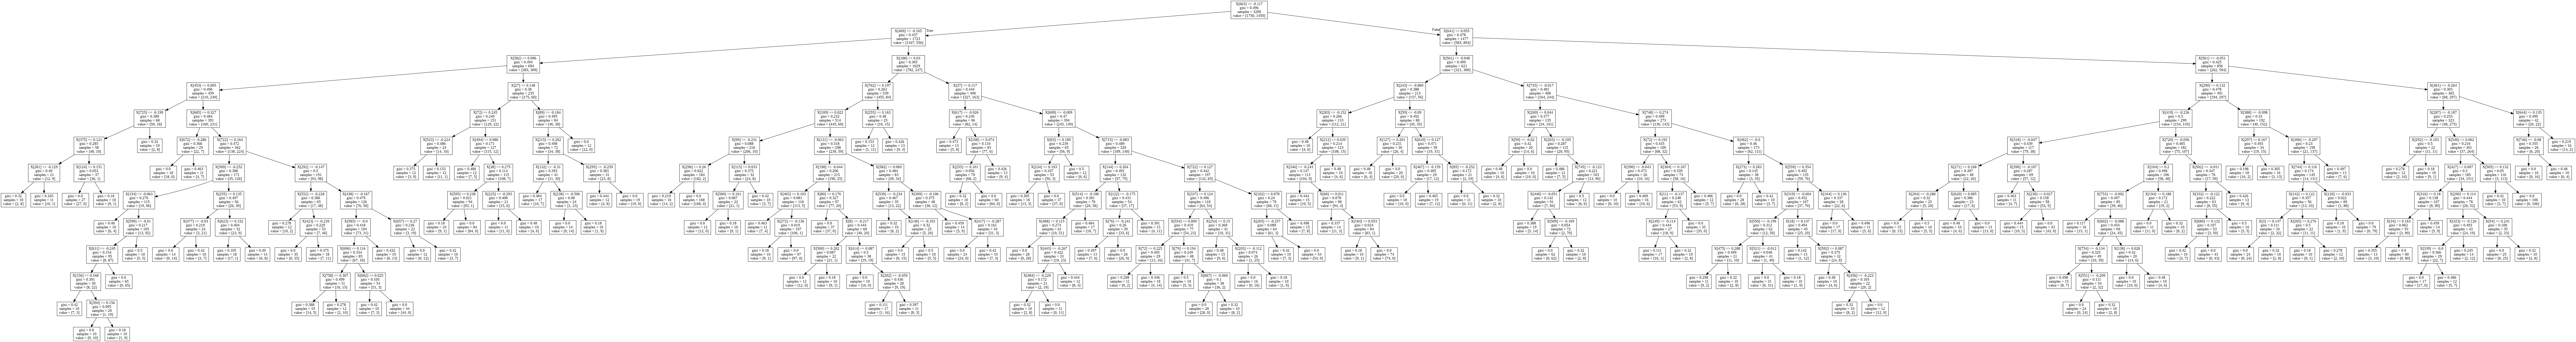

In [40]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                #feature_names=features, 
                                #class_names=clf.classes_,  
                                #filled=True, rounded=True,  
                                #special_characters=True
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [41]:
# prediction on train set
start_time=time.time();
y_pred = clf.predict(x_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.005759000778198242 seconds ---


In [42]:
from sklearn.metrics import *
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.883125
F1-score [0.89362912 0.870319  ]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1750
           1       0.88      0.87      0.87      1450

    accuracy                           0.88      3200
   macro avg       0.88      0.88      0.88      3200
weighted avg       0.88      0.88      0.88      3200



In [43]:
confusion_matrix(y_train, y_pred)

array([[1571,  179],
       [ 195, 1255]])

In [44]:
# prediction on test set
start_time=time.time();
y_pred = clf.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0017032623291015625 seconds ---


In [45]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.6225
F1-score [0.65759637 0.57938719]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       422
           1       0.61      0.55      0.58       378

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.62       800



array([[290, 132],
       [170, 208]])

## Entropy Criterion

In [46]:
# entropy criterion
start_time=time.time();
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                             min_samples_split=10, min_samples_leaf=10)
clf.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.7092225551605225 seconds ---


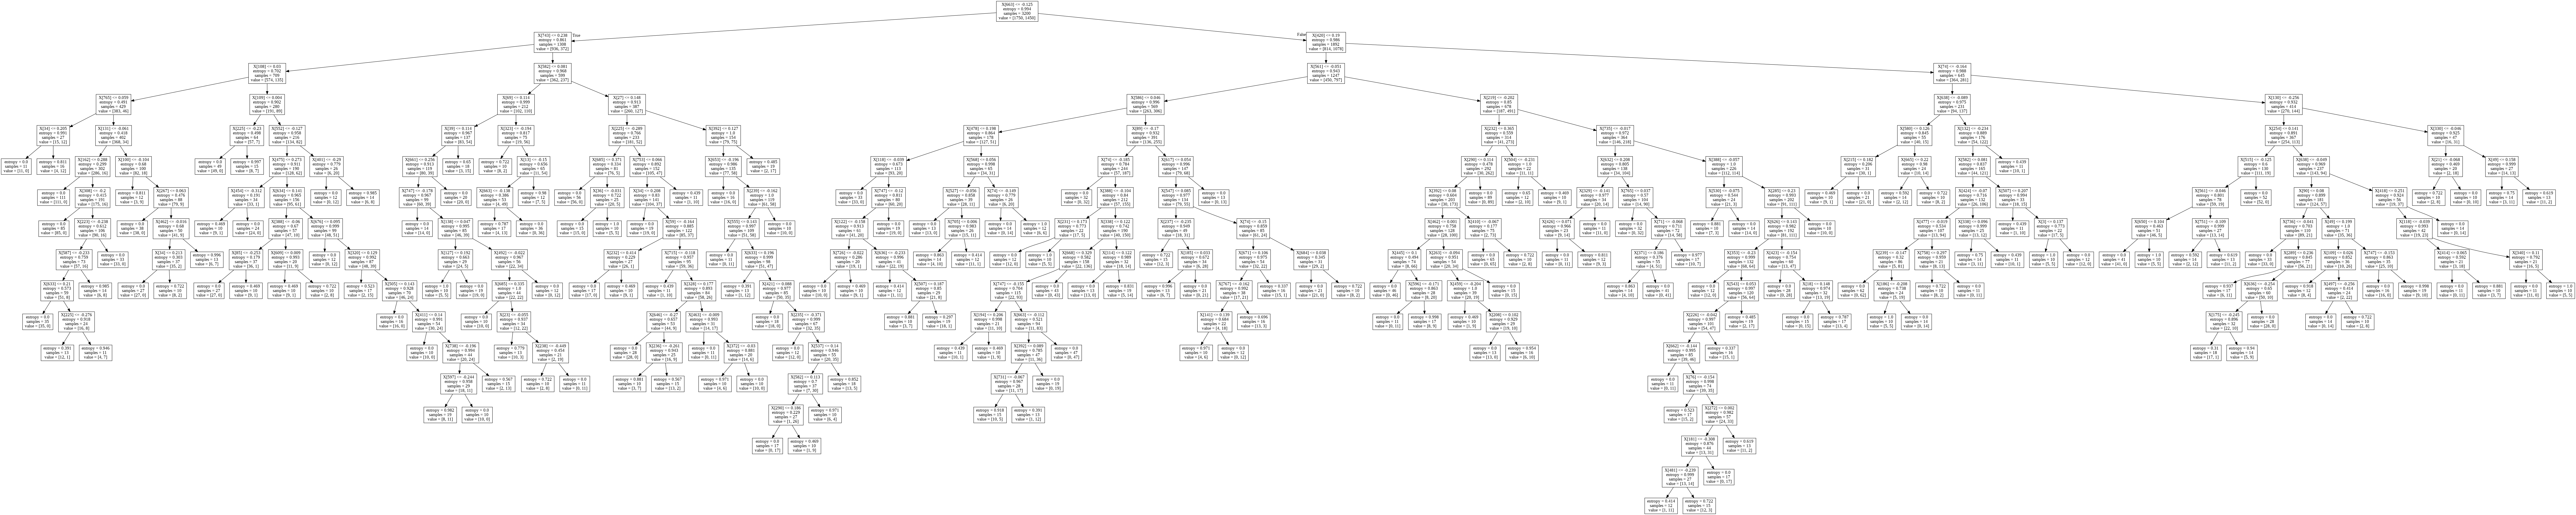

In [47]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                #feature_names=features, 
                                #class_names=clf.classes_,  
                                #filled=True, rounded=True,  
                                #special_characters=True
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [48]:
# prediction on train set
start_time=time.time();
y_pred = clf.predict(x_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.006446123123168945 seconds ---


In [49]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Accuracy 0.909375
F1-score [0.91671453 0.90061686]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1750
           1       0.90      0.91      0.90      1450

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200



array([[1596,  154],
       [ 136, 1314]])

In [50]:
# prediction on test set
start_time=time.time();
y_pred = clf.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.002083301544189453 seconds ---


In [51]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.6075
F1-score [0.64479638 0.56145251]
              precision    recall  f1-score   support

           0       0.62      0.68      0.64       422
           1       0.59      0.53      0.56       378

    accuracy                           0.61       800
   macro avg       0.61      0.60      0.60       800
weighted avg       0.61      0.61      0.61       800



array([[285, 137],
       [177, 201]])

## ROC Curve

In [0]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [53]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

[0, 1]

In [54]:
# ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
fpr, tpr, _ = roc_curve(by_test[:], by_pred[:])
roc_auc = auc(fpr, tpr)
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.6035507409914992

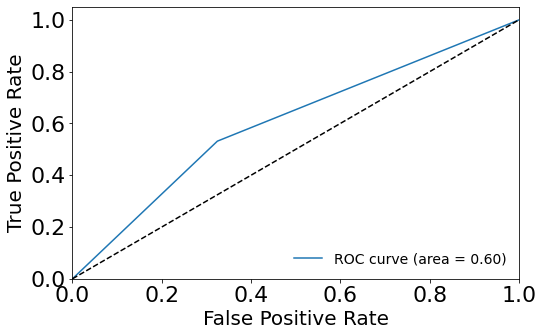

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()